## COMP5318 - Machine Learning and Data Mining 

## Tutorial 2 - Matrix Decomposition

**Semester 2, 2019**

**Objectives:**

* To perform linear algebraic calculations in python.
* To become familiar matrix decomposition techniques.
* To use SVD as a compression technique.


**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab2.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab2.ipynb" file
* Complete exercises in "lab2.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran


# Numpy library

## Defining numpy arrays

In [ ]:
x_list = [1, 2, 3, 6, 9, 13] #define a python list

print( x_list )
print( x_list[0] ) #slicing
print( x_list[1:-2] ) #slicing 

In [ ]:
#let us use numpy library 
import numpy as np

x = np.array([1, 2, 3, 6, 9, 13]) #define a numpy array

print( x )
print( x[0] ) #slicing
print( x[1:-2] ) #slicing 

## Numpy operations and slicing

In [ ]:
import math
y1_list = [2*x_i for x_i in x_list]
y2_list = [x_i**2 + 2*x_i + 1 for x_i in x_list]
y3_list = [math.log10(x_i) for x_i in x_list]
y4_list = [x_i > 4 for x_i in x_list]

print( 'x_list = ', x_list )
print( 'y1_list = ', y1_list )
print( 'y2_list = ',  y2_list )
print( 'y3_list = ',  y3_list, '\n and rounded y3_list = ',  [round(y3_i, 4) for y3_i in y3_list] )
print( 'y4_list = ',  y4_list )

In [ ]:
#let us use numpy library 
y1 = 2*x
y2 = x**2 + 2*x + 1
y3 = np.log10(x)
y4 = x > 4
print( 'x = ', x )
print( 'y1 = ', y1 )
print( 'y2 = ',  y2 )
print('y3 = ',  y3, '\n and rounded y3 = ',  np.round(y3, 4) )
print( 'y4 = ',  y4 )

## Generating a numpy sequence

In [ ]:
x = [i for i in range(0, 10, 2)] #arguments are (start, stop, step); by default start is zero and step is 1
print( x ) 
#Otherwise, list(range(0, 10, 2)) 

In [ ]:
#let us use numpy library 
x = np.arange(0, 10, 2) #arguments are (start, stop, step); by default start is zero and step is 1
print( x ) 

**Exercise 1.3.1**

Use numpy to determine the roots of $x^2+bx+1=0$ for $b \in (4,11] \cap \mathbb{Z}$

Hint: $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$ are roots of $ax^2+bx+c = 0$

In [ ]:
#answer
a = 1
b = np.arange(5, 12)
c = 1
delta = np.sqrt(b**2 - 4*a*c)
print('b = ', b)
print( 'with -:', np.round((-b-delta)/(2*a), 2), 'or')
print( 'with +:', np.round((-b+delta)/(2*a), 2) )

**Exercise 1.3.2**

Plot $sin(2\pi ft)exp(-t/2)$ for t=0 to t=10 with a step size of 1/50. Use numpy to define arrays and make calculations. 

Hint: If python lists were used as in section 8 of tutorial 1,

In [ ]:
import math
import matplotlib.pyplot as pl
%matplotlib inline 

t = [i/50 for i in range(501)] #generate values from 0 to 10
f = 1 
y = [math.sin(2*math.pi*f*i)*math.exp(-i/2) for i in t] # y = sin(2Pi*f*t)*exp(-t/2)
pl.scatter(t,y)
pl.show()

In [ ]:
#answer
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

t = np.arange(501)/50
f = 1
y = np.sin(2*np.pi*f*t) * np.exp(-t/2)
pl.scatter(t, y)
pl.show()

In [ ]:
#Try the following code in a non-ipyhon environment
"""
from matplotlib.widgets import Slider

ax = pl.subplot(111)
pl.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 10, 0.02)
a0 = 0
f0 = 1
s = np.exp(a0*t)*np.sin(2*np.pi*f0*t)
l, = pl.plot(t,s, lw=2, color='red')

axfreq = pl.axes([0.25, 0.1, 0.65, 0.03])
axdamp  = pl.axes([0.25, 0.15, 0.65, 0.03])

sfreq = Slider(axfreq, 'Freq', 0.5, 3.0, valinit=f0)
sdamp = Slider(axdamp, 'Damp', -0.5, 0.5, valinit=a0)

def update(val):
    damp = sdamp.val
    freq = sfreq.val
    l.set_ydata(np.exp(damp*t)*np.sin(2*np.pi*freq*t))
    pl.draw()
sfreq.on_changed(update)
sdamp.on_changed(update)

pl.show()
"""

## Matrix operations

In [ ]:
# Create a new array with three elements
A = np.array([1, 2, 3])
a = np.diag(A)
print( 'A = \n {}'.format(A) )
print( 'shape of A is {} \n'.format(A.shape) )
print( 'a = \n {}'.format(a) )
print( 'shape of a is {} \n'.format(a.shape) )

B = np.array([[1, 2, 3]])
print( 'B = \n {}'.format(B) )
print( 'shape of B is {} \n'.format(B.shape) )

#Create a 2x3 array
C = np.array([[1, 2, 3],[4, 5, 6]])
print( 'C = \n {}'.format(C) )
print( 'shape of C is {} \n'.format(C.shape) )

#Create a 3x3 array
D = np.array([[1, 2, 3],[3, 5, 6],[2, 8, 11]])
print( 'D = \n {}'.format(D) )
print( 'shape of D is {} \n'.format(D.shape) )

#Create a 3x2 array
E = np.array([[2, 0],[4, 1], [1, 2]])
print( 'E = \n {}'.format(E) )
print( 'shape of E is {} \n'.format(E.shape) )

F = np.array([[4, 2, 11, 3]])
print( 'F = \n {}'.format(F) )
print( 'shape of F is {} \n'.format(F.shape) )

**Exercise 1.4.1**

Perform the following matrix operations.

1. $E'$
2. $E' \circ C$ (elementwise matrix multiplication)
3. $E \cdot C$ (matrix multiplication)
4. $B' \cdot F$
5. $A' \cdot F$

Hint: Identify the use of A[np.newaxis, :], A[:, np.newaxis], A[:, np.newaxis, :], etc. Alternative to [:, np.newaxis] is [:, None].

In [ ]:
#Answers

Et = E.T
print( 'Et = \n {} \n'.format(Et) )

EtoC = E.T*C
print( 'E\'oC = \n {} \n'.format(EtoC) ) 

EC = E.dot(C)
print( 'E.C = \n {} \n'.format(EC) ) #or np.dot(E, C)

BtF = B.T.dot(F)
print( 'B\'.F = \n {} \n'.format(BtF))

AtF = A[np.newaxis, :].T.dot(F)
print( 'A\'.F = \n {} \n'.format(AtF))

**Exercise 1.4.2**

For random square matrices A and B, show that the following identy is valid.

\begin{equation}
(A^\top B)^{−1}=B^{−1}A^{−\top}$
\end{equation}

Hint: The following numpy methods maybe useful; np.random.random((N,N)), np.linalg.inv() and np.allclose(). 

# Matrix Decomposition

## Matrix decomposition using numpy

**Exercise 2.1.1**

Decompose the following matrix $A$ using,
1. QR decomposition
2. Eigendecomposition

Verify,
1. Eigenvalues obtained from numpy Eigendecomposition are Eigenvalues of A
2. Eigenvector matrix is an orthogonal matrix

In [9]:
A = np.diag((1, 2, 3))
print(A)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [10]:
Q, R = np.linalg.qr(A)
print('Q=\n', np.round(Q, 2))
print('\nR=\n', np.round(R, 2))

#A = QR of an orthogonal matrix Q and an upper triangular matrix R
#A = LU of an lower triangular matrix L and an upper triangular matrix U

Q=
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0. -0.  1.]]

R=
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


In [11]:
l, v = np.linalg.eig(A)
print(l, '\n')
print(v, '\n')
print((A-l*np.eye(A.shape[0])).dot(v), '\n') # (A-lI)U = 0
print(v.T.dot(v)) #orthogonal if U'U = UU'= I or you can use inverse

[1. 2. 3.] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Singular value decomposition

A matrix $A$ of size $m \times n$ can be decomposed into,

\begin{equation}
A =  U \Sigma V'
\end{equation}

where

$U$ is a $m \times r$ unitary matrix (i.e for this context, $U^\top U = I$)

$\Sigma$ is a $r \times r$ diagonal matrix. Diagonal elements are *called singular values* which are non-negative.

$V'$ is a $r \times n$ unitary matrix

In [1]:
import numpy as np

#user vs movie, a 7x5 matrix
A = np.array([[1, 1, 1, 0, 0],\
              [3, 3, 3, 0, 0],\
              [4, 4, 4, 0, 0],\
              [5, 5, 5, 0, 0],\
              [0, 2, 0, 4, 4],\
              [0, 0, 0, 5, 5],\
              [0, 1, 0, 2, 2]])

U, s, Vt = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)

print( 'U = {} \n\n s = {} \n\n S = {} \n\n Vt = {} \n'.format(np.round(U, 2), np.round(s, 2), np.round(S, 2), np.round(Vt, 2)) )

A_reconstructed = U.dot(S.dot(Vt))

print( 'A_reconstructed = {} \n'.format(np.round(A_reconstructed, 2)) )
print( 'Is A close to A_reconstructed? ', np.allclose(A, A_reconstructed) )

U = [[-0.14  0.02  0.01  0.99 -0.  ]
 [-0.41  0.07  0.03 -0.06 -0.89]
 [-0.55  0.09  0.04 -0.08  0.42]
 [-0.69  0.12  0.05 -0.1   0.19]
 [-0.15 -0.59 -0.65 -0.    0.  ]
 [-0.07 -0.73  0.68  0.   -0.  ]
 [-0.08 -0.3  -0.33 -0.   -0.  ]] 

 s = [12.48  9.51  1.35  0.    0.  ] 

 S = [[12.48  0.    0.    0.    0.  ]
 [ 0.    9.51  0.    0.    0.  ]
 [ 0.    0.    1.35  0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]] 

 Vt = [[-0.56 -0.59 -0.56 -0.09 -0.09]
 [ 0.13 -0.03  0.13 -0.7  -0.7 ]
 [ 0.41 -0.8   0.41  0.09  0.09]
 [-0.71  0.    0.71 -0.    0.  ]
 [-0.    0.   -0.    0.71 -0.71]] 

A_reconstructed = [[ 1.  1.  1.  0.  0.]
 [ 3.  3.  3. -0. -0.]
 [ 4.  4.  4.  0. -0.]
 [ 5.  5.  5. -0. -0.]
 [ 0.  2. -0.  4.  4.]
 [ 0.  0. -0.  5.  5.]
 [ 0.  1. -0.  2.  2.]] 

Is A close to A_reconstructed?  True


In [2]:
#A sanity check
print( np.allclose(U.T.dot(U), np.eye(5)), '\n' )
print( np.eye(5), '\n' )
print( np.allclose(Vt.dot(Vt.T), np.eye(5)), '\n' )

print( np.sqrt(A.dot(A.T))) 

True 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 

True 

[[1.73205081 3.         3.46410162 3.87298335 1.41421356 0.
  1.        ]
 [3.         5.19615242 6.         6.70820393 2.44948974 0.
  1.73205081]
 [3.46410162 6.         6.92820323 7.74596669 2.82842712 0.
  2.        ]
 [3.87298335 6.70820393 7.74596669 8.66025404 3.16227766 0.
  2.23606798]
 [1.41421356 2.44948974 2.82842712 3.16227766 6.         6.32455532
  4.24264069]
 [0.         0.         0.         0.         6.32455532 7.07106781
  4.47213595]
 [1.         1.73205081 2.         2.23606798 4.24264069 4.47213595
  3.        ]]


**Exercise 2.2.1**

1. What is the rank of $A$?
    Hint: Perform EROs. Why are some of the singular values close to zero?

2. Calculate the compression ratio.

3. Reconstruct the matrix using only the most significant singular values.

In [3]:
#answer
print('S = \n', S, '\n')
print('S.shape[0] = ', S.shape[0], '\n')
for n_components in range(1,S.shape[0]):    
    A_hat_reconstructed = U[0:U.shape[0], 0:n_components]\
       .dot(S[0:n_components,0:n_components])\
       .dot(Vt[0:n_components, 0:Vt.shape[1]])
    SSE = np.sum((A - A_hat_reconstructed)**2) 
    approx_ratio = n_components/A.shape[1] 
    comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])
    
    #print(np.round(a,2))  
    print('If we choose {} dominant singular value/s;\n A_hat_reconstructed = \n{} \n SSE = {} and\n compresion ratio = {}\n\n'\
          .format(n_components, np.round(A_hat_reconstructed, 2), SSE, np.round(comp_ratio,10)))    

S = 
 [[1.24810147e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.50861406e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.34555971e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.84716760e-16
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.74452038e-33]] 

S.shape[0] =  5 

If we choose 1 dominant singular value/s;
 A_hat_reconstructed = 
[[0.97 1.02 0.97 0.15 0.15]
 [2.9  3.05 2.9  0.46 0.46]
 [3.86 4.07 3.86 0.62 0.62]
 [4.83 5.09 4.83 0.77 0.77]
 [1.07 1.13 1.07 0.17 0.17]
 [0.51 0.53 0.51 0.08 0.08]
 [0.54 0.57 0.54 0.09 0.09]] 
 SSE = 92.22427221863023 and
 compresion ratio = 0.3714285714


If we choose 2 dominant singular value/s;
 A_hat_reconstructed = 
[[ 0.99  1.01  0.99 -0.   -0.  ]
 [ 2.98  3.04  2.98 -0.   -0.  ]
 [ 3.98  4.05  3.98 -0.01 -0.01]
 [ 4.97  5.06  4.97 -0.01 -0.01]
 [ 0.36  1.29  0.36  4.08  4.08]
 [-0.37  0.73 

**Exercise 2.2.2**
Make use of SVD to compress a gray-scale image.

In [4]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import misc
%matplotlib inline

A = misc.face(gray=True)
print(A)

[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]


In [5]:
n_components = 50

U, s, Vt = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)

print('U =', U, '\n')
print('s =', s, '\n')
print('S =', S, '\n')
print('Vt =', Vt, '\n')

A_hat_reconstructed = U[0:U.shape[0], 0:n_components]\
       .dot(S[0:n_components,0:n_components])\
       .dot(Vt[0:n_components, 0:Vt.shape[1]])
SSE = np.sum((A - A_hat_reconstructed)**2) 
comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])

print('If we choose {} dominant singular value/s;\n SSE = {} and\n compresion ratio = {}\n\n'\
      .format(n_components, SSE, np.round(comp_ratio,10)))

U = [[-0.03178047  0.01899494 -0.01767694 ... -0.00515354 -0.02000072
  -0.00536943]
 [-0.03188899  0.01772787 -0.01609502 ...  0.01819321  0.05044649
  -0.00025865]
 [-0.03273099  0.01230324 -0.01228203 ... -0.00532875 -0.05318634
   0.00289746]
 ...
 [-0.03034585 -0.03641649 -0.00249968 ...  0.04908979 -0.07563333
   0.08396142]
 [-0.03011329 -0.03554472 -0.00048348 ... -0.03926725  0.07966796
  -0.03974808]
 [-0.03001502 -0.0346442   0.00087503 ...  0.01853222 -0.03471804
   0.00336473]] 

s = [1.03201724e+05 2.16102403e+04 1.60637957e+04 1.15821292e+04
 1.05951786e+04 9.66345795e+03 7.99184891e+03 6.87677857e+03
 6.69588499e+03 6.59355476e+03 5.91453280e+03 5.42886595e+03
 4.50909679e+03 4.38932271e+03 4.25876282e+03 4.10605910e+03
 3.91046455e+03 3.75857842e+03 3.56340264e+03 3.52621155e+03
 3.46129446e+03 3.22091033e+03 3.06196186e+03 3.02638759e+03
 2.87670586e+03 2.83644056e+03 2.78628907e+03 2.70230723e+03
 2.62257954e+03 2.58802393e+03 2.50890788e+03 2.47047887e+03
 2.4054380

In [6]:
"""
#if Eigenvalues have not been sorted somehow - not relevant to np.linalg.svd
n_components = 50

U, s, Vt = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)

q = np.argsort(np.diag(S))[::-1] #get positions of sorted (ascending) array and reverse (to get descenting)
sig = q[:n_components] #positions of dominant slices

A_hat_reconstructed = U[np.ix_(np.arange(U.shape[0]), sig)]\
   .dot(S[np.ix_(sig, sig)]\
   .dot(Vt[np.ix_(sig, np.arange(Vt.shape[1]))]) )
SSE = np.sum((A - A_hat_reconstructed)**2) 
comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])

print('If we choose {} dominant singular value/s;\n SSE = {} and\n compresion ratio = {}\n\n'\
      .format(n_components, SSE, np.round(comp_ratio,10)))
"""

"\n#if Eigenvalues have not been sorted somehow - not relevant to np.linalg.svd\nn_components = 50\n\nU, s, Vt = np.linalg.svd(A, full_matrices=False)\nS = np.diag(s)\n\nq = np.argsort(np.diag(S))[::-1] #get positions of sorted (ascending) array and reverse (to get descenting)\nsig = q[:n_components] #positions of dominant slices\n\nA_hat_reconstructed = U[np.ix_(np.arange(U.shape[0]), sig)]   .dot(S[np.ix_(sig, sig)]   .dot(Vt[np.ix_(sig, np.arange(Vt.shape[1]))]) )\nSSE = np.sum((A - A_hat_reconstructed)**2) \ncomp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])\n\nprint('If we choose {} dominant singular value/s;\n SSE = {} and\n compresion ratio = {}\n\n'      .format(n_components, SSE, np.round(comp_ratio,10)))\n"

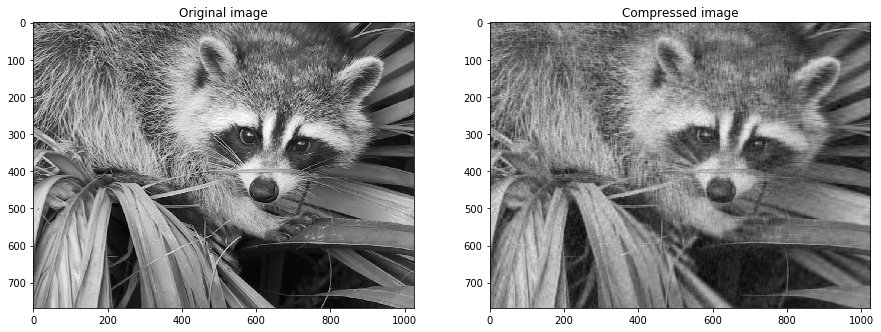

In [7]:
pl.figure(figsize=(15,10)) #figsize=(15,10)
pl.subplot(121)
pl.imshow(A, cmap=pl.cm.gray)
pl.title('Original image')
pl.subplot(122)
pl.imshow(A_hat_reconstructed, cmap=pl.cm.gray)
pl.title('Compressed image')
pl.show()